# ***MNIST Example***

In [1]:
# please make sure that you have the following libraries, otherwise you shall install them.
# just uncomment the pip command down below and run this cell
# %pip install numpy matplotlib idx2numpy os plotly
# pip install -U kaleido   # in cmd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import idx2numpy
from nn import *

In [3]:
X_train = idx2numpy.convert_from_file(
    './dataset/train-images-idx3-ubyte').reshape(60000, 784)
X_cv, X_train = X_train[0 : 10000, :], X_train[10000 ::, :]
X_test = idx2numpy.convert_from_file(
    './dataset/t10k-images-idx3-ubyte').reshape(10000, 784)
y_train = idx2numpy.convert_from_file('./dataset/train-labels-idx1-ubyte')
y_cv, y_train = y_train[0 : 10000], y_train[10000 ::]
y_test = idx2numpy.convert_from_file('./dataset/t10k-labels-idx1-ubyte')

In [4]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(50000, 784)
(10000, 784)
(10000, 784)
(50000,)
(10000,)
(10000,)


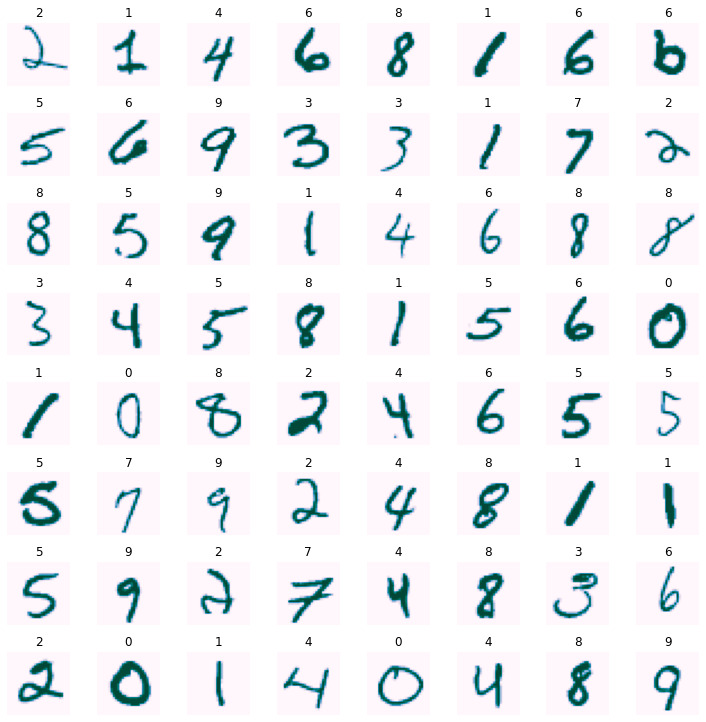

In [5]:
m, n = X_train.shape

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28, 28))

    # Display the image
    ax.imshow(X_random_reshaped, cmap='PuBuGn')

    # Display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()

In [6]:
def relu(Z): return np.maximum(0, Z)

def relu_derevative(Z): return Z > 0

def softmax(Z):
    exponentias = np.exp(Z - np.max(Z, axis=1).reshape(-1, 1))
    return exponentias / np.sum(exponentias, axis=1).reshape(-1, 1)

def softmax_grad(soft):
    s = soft.reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)

In [7]:
model = NeuralNetwork(
    X_train=X_train,
    X_cv=X_cv,
    X_test=X_test,
    y_train=y_train,
    y_cv=y_cv,
    y_test=y_test,
    layers=[
        Layer(neurons=25, activation=relu, activation_drev=relu_derevative),
        Layer(neurons=15, activation=relu, activation_drev=relu_derevative),
        Layer(neurons=10, activation=softmax, activation_drev=softmax_grad)
    ]
)

In [8]:
# Hyperparameters

ALPHA = 0.01
BETA_1 = 0.9
BETA_2 = 0.999
LAMBDA = 64.0
LEARNING_RATE_DECAY = 0.002
NUM_EPOCHS = 150
MINI_BATCH = 256

In [9]:
model.fit(NUM_EPOCHS, ALPHA, BETA_1, BETA_2, LAMBDA, MINI_BATCH, LEARNING_RATE_DECAY)

epoch: 0
training set prediction accuracy 7.571999999999999
epoch: 10
learning rate = 0.009745220943649234
training set prediction accuracy 96.208
epoch: 20
learning rate = 0.00913274268801987
training set prediction accuracy 96.518
epoch: 30
learning rate = 0.008236719404338328
training set prediction accuracy 96.664
epoch: 40
learning rate = 0.007154252399312716
training set prediction accuracy 96.832
epoch: 50
learning rate = 0.00598870640411771
training set prediction accuracy 96.978
epoch: 60
learning rate = 0.00483449881825277
training set prediction accuracy 97.162
epoch: 70
learning rate = 0.0037661715357389237
training set prediction accuracy 97.334
epoch: 80
learning rate = 0.0028330200572136604
training set prediction accuracy 97.494
epoch: 90
learning rate = 0.002059024508405863
training set prediction accuracy 97.628
epoch: 100
learning rate = 0.001446732565222244
training set prediction accuracy 97.758
epoch: 110
learning rate = 0.0009832728207830692
training set predicti

In [10]:
model.forwardPropagation(model.X_train_norm)
print(f'training set prediction accuracy {100 * model.getAccuracy(y=model.y_train)}')

model.forwardPropagation(model.X_cv_norm)
print(f'cross validating set prediction accuracy {100 * model.getAccuracy(y=model.y_cv)}')

model.forwardPropagation(model.X_test_norm)
print(f'testing set prediction accuracy {100 * model.getAccuracy(y=model.y_test)}')

training set prediction accuracy 98.012
cross validating set prediction accuracy 96.67
testing set prediction accuracy 96.67


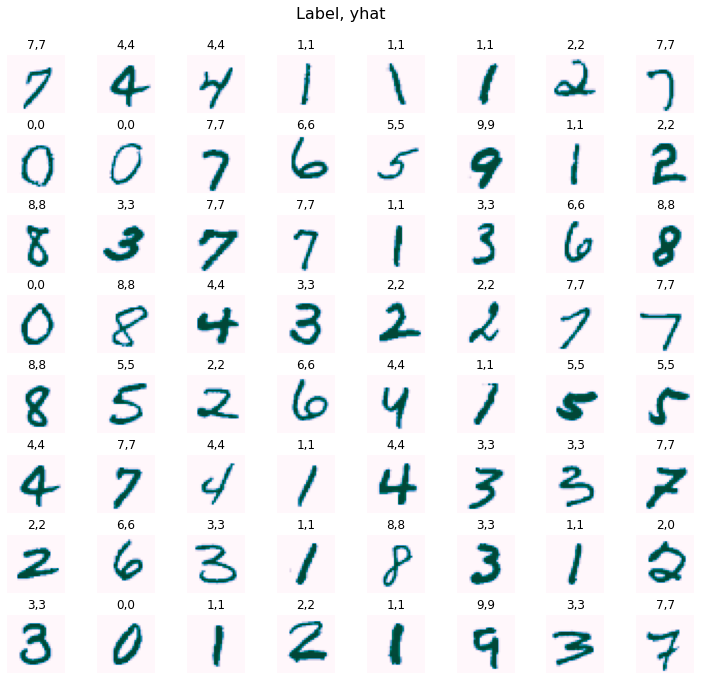

In [11]:
model.forwardPropagation(model.X_test_norm)

m, n = X_test.shape

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='PuBuGn')
    
    # Predict using the Neural Network
    yhat = np.argmax(model.y_predict[random_index])

    # Display the label above the image
    ax.set_title(f"{y_test[random_index]},{yhat}")
    ax.set_axis_off()

fig.suptitle("Label, yhat", fontsize=16)
plt.show()

In [12]:
model.saveModel(index=1, learning_rate=ALPHA, beta1=BETA_1, beta2=BETA_2, lambda_=LAMBDA, mini_batch=MINI_BATCH, learning_rate_decay=LEARNING_RATE_DECAY)